

---
- MAI XUÂN BÁCH
- 11200489
- DSEB 62


---



---




**ĐỀ BÀI**

Câu 1:
Tạo ra 1 bộ dataset từ 10 điểm dữ liệu sinh ra từ hàm y = x^2 + noise. Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Sau đó thêm 100 dữ liệu nữa xem hàm đa thức bậc 9 như nào?
Hãy báo cáo MSE và vẽ đồ thị trong hai trường hợp (10 điểm dữ liệu ban đầu và 100 điểm dữ liệu sau)
Hiện tượng gì đang xảy ra?

Câu 2: Code from scratch
Implement hàm tính convolution
Input: X, W, stride, padding
Output: Y
Kiểm tra lại với hàm tính convolution được implement trong thư viện Pytorch

Câu 3:
Cho dataset CIFAR-10
Implement 1 model tương tự VGG16 (có thể nông hơn) với dữ liệu trên sử dụng Pytorch
Chỉnh learning rate, vẽ đồ thị loss tương ứng.
Chia tập train/test tỉ lệ 80/20, tính các chỉ số accuracy, recall, f1-score trên tập test.

Câu 4
Tại sao khi build model, càng những layer phía sau, width và height giảm nhưng depth lại tăng

Câu 5 (Optional)
1 bài viết hay bao gồm tool sử dụng để vísualize CNN model


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

In [2]:
import torch.nn.functional as F

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [5]:
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import train_test_split

# 1.
Tạo ra 1 bộ dataset từ 10 điểm dữ liệu sinh ra từ hàm y = x^2 + noise. Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Sau đó thêm 100 dữ liệu nữa xem hàm đa thức bậc 9 như nào? Hãy báo cáo MSE và vẽ đồ thị trong hai trường hợp (10 điểm dữ liệu ban đầu và 100 điểm dữ liệu sau) Hiện tượng gì đang xảy ra?

## 10 data points

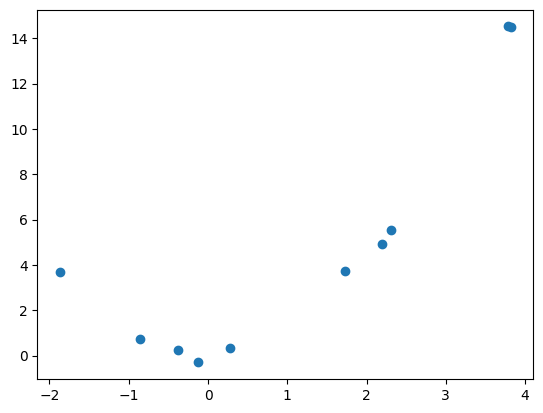

In [6]:
x = np.random.uniform(-5,5,10)
y = [each ** 2 + np.random.normal(0, 0.3) for each in x]

plt.scatter(x, y)

In [7]:
def polynomial_regression(x, y, order):
  poly = PolynomialFeatures(degree=order)
  poly_features = poly.fit_transform(x.reshape(-1, 1))

  poly_reg_model = LinearRegression()
  poly_reg_model.fit(poly_features, y)
  y_predicted = poly_reg_model.predict(poly_features)

  mse = mean_squared_error(y, y_predicted)

  plt.figure(figsize=(10, 6))
  plt.title("Degree: {}".format(order), size=16)
  plt.scatter(x, y, c = "blue")
  plt.scatter(x, y_predicted, c="red")
  plt.show()

  return mse

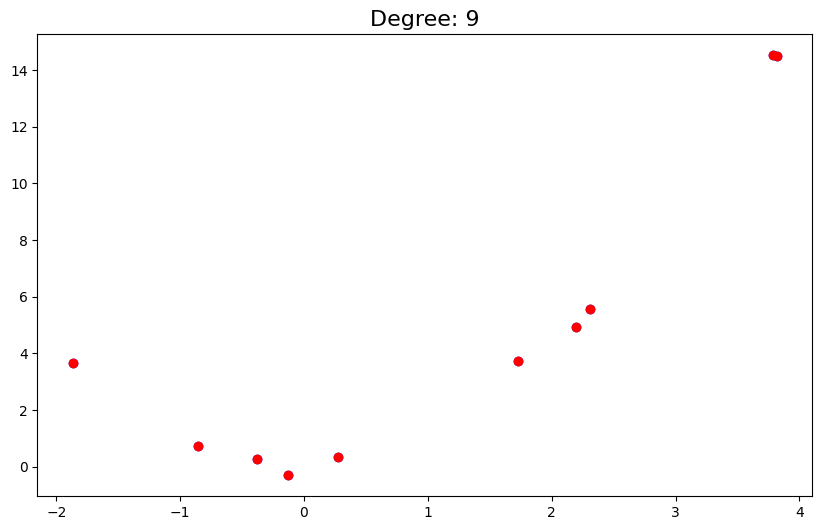

MSE:  3.0239637481618544e-22


In [8]:
print("MSE: ", polynomial_regression(x, y, 9))

**With polynomial function with degree = 9, it fits perfect for this sample dataset.**

## 100 data points

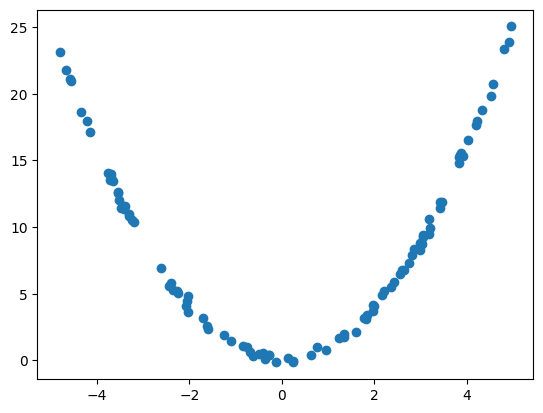

In [9]:
x = np.random.uniform(-5,5,100)
y = [each ** 2 + np.random.normal(0, 0.3) for each in x]

plt.scatter(x, y)

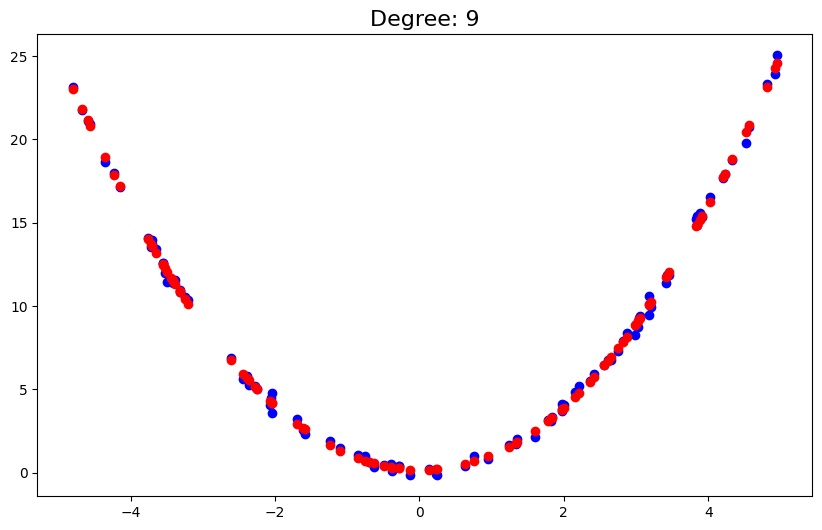

MSE:  0.06835659364132099


In [10]:
print("MSE: ", polynomial_regression(x, y, 9))

**COMMENT: It is overfitting when the number of data points is small**

# 2.
Code from scratch Implement hàm tính convolution Input: X, W, stride, padding Output: Y Kiểm tra lại với hàm tính convolution được implement trong thư viện Pytorch

In [11]:
# Hàm tính convolution từ đầu
def custom_conv2d(X, W, stride=1, padding=0):
    batch_size, in_channels, in_height, in_width = X.shape
    out_channels, _, kernel_height, kernel_width = W.shape

    # Tính kích thước của đầu ra
    out_height = (in_height - kernel_height + 2 * padding) // stride + 1
    out_width = (in_width - kernel_width + 2 * padding) // stride + 1

    Y = torch.zeros((batch_size, out_channels, out_height, out_width))

    # Thực hiện convolution
    for b in range(batch_size):
        for c in range(out_channels):
            for i in range(0, in_height - kernel_height + 1, stride):
                for j in range(0, in_width - kernel_width + 1, stride):
                    Y[b, c, i // stride, j // stride] = torch.sum(X[b, :, i:i+kernel_height, j:j+kernel_width] * W[c])

    return Y

In [12]:
# Kiểm tra với hàm tính convolution của PyTorch
X = torch.randn(1, 1, 5, 5)  # Batch size 1, 1 channel, 5x5 input
W = torch.randn(1, 1, 3, 3)  # 1 filter, 1 channel, 3x3 kernel
stride = 1
padding = 0

print("X:", X)
print("W:", W)

# Tính convolution bằng hàm tự triển khai
custom_result = custom_conv2d(X, W, stride, padding)

# Tính convolution bằng hàm tích hợp trong PyTorch
torch_result = F.conv2d(X, W, stride=stride, padding=padding)

# Kiểm tra xem kết quả của cả hai phương pháp có gần giống nhau không
print("Custom Convolution Result:")
print(custom_result)

print("\nPyTorch Convolution Result:")
print(torch_result)

# Kiểm tra sự tương đồng giữa hai kết quả
print("\nCheck similarity:")
print(torch.allclose(custom_result, torch_result))

X: tensor([[[[ 0.3297, -0.3227,  1.4609, -1.2357, -0.4495],
          [ 0.7927, -0.1708,  0.2471,  0.8998,  0.0939],
          [-0.5265,  0.6165,  0.4546,  0.2829,  0.5379],
          [-1.0743,  0.3334,  0.9530,  0.5181,  1.0760],
          [ 0.2872,  0.7052,  3.0493,  0.2967,  0.1454]]]])
W: tensor([[[[ 0.7283, -0.4453,  1.1858],
          [ 1.0800, -0.6000,  0.4731],
          [-1.5610,  0.7010,  0.2807]]]])
Custom Convolution Result:
tensor([[[[ 4.5732, -2.8222,  0.4922],
          [ 2.4010,  1.6526, -0.3562],
          [-0.1266,  1.7354, -2.4409]]]])

PyTorch Convolution Result:
tensor([[[[ 4.5732, -2.8222,  0.4922],
          [ 2.4010,  1.6526, -0.3562],
          [-0.1266,  1.7354, -2.4409]]]])

Check similarity:
True


# 3.
Cho dataset CIFAR-10 Implement 1 model tương tự VGG16 (có thể nông hơn) với dữ liệu trên sử dụng Pytorch Chỉnh learning rate, vẽ đồ thị loss tương ứng. Chia tập train/test tỉ lệ 80/20, tính các chỉ số accuracy, recall, f1-score trên tập test.

In [33]:
# Set up the configuration
batch_size = 64
learning_rate = 0.001
num_epochs = 20

In [34]:
# Prepare CIFAR-10 data
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomCrop(32, padding=4),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Split the train dataset into train and validation (80/20)
train_indices, val_indices = train_test_split(list(range(len(train_dataset))), test_size=0.2, random_state=42)
train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)

train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=val_sampler)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [35]:
# Build a simpler CNN model than VGG16
class SimpleVGG16(nn.Module):
    def __init__(self):
        super(SimpleVGG16, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

In [36]:
# Initialize the model and optimizer
model = SimpleVGG16()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_loss:.4f}')

    # Validation
    model.eval()
    running_loss = 0.0
    y_true_val = []
    y_pred_val = []
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            y_true_val.extend(labels.cpu().numpy())
            y_pred_val.extend(predicted.cpu().numpy())

    val_loss = running_loss / len(val_loader)
    val_losses.append(val_loss)
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    print(f'Epoch [{epoch + 1}/{num_epochs}] - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}')


Epoch [1/20] - Train Loss: 1.5883
Epoch [1/20] - Validation Loss: 1.3729 - Validation Accuracy: 0.5013
Epoch [2/20] - Train Loss: 1.2699
Epoch [2/20] - Validation Loss: 1.2136 - Validation Accuracy: 0.5709
Epoch [3/20] - Train Loss: 1.1325
Epoch [3/20] - Validation Loss: 1.0946 - Validation Accuracy: 0.6080
Epoch [4/20] - Train Loss: 1.0513
Epoch [4/20] - Validation Loss: 1.0527 - Validation Accuracy: 0.6229
Epoch [5/20] - Train Loss: 0.9924
Epoch [5/20] - Validation Loss: 0.9899 - Validation Accuracy: 0.6496
Epoch [6/20] - Train Loss: 0.9442
Epoch [6/20] - Validation Loss: 0.9484 - Validation Accuracy: 0.6624
Epoch [7/20] - Train Loss: 0.9088
Epoch [7/20] - Validation Loss: 0.9296 - Validation Accuracy: 0.6747
Epoch [8/20] - Train Loss: 0.8755
Epoch [8/20] - Validation Loss: 0.8890 - Validation Accuracy: 0.6875
Epoch [9/20] - Train Loss: 0.8420
Epoch [9/20] - Validation Loss: 0.8728 - Validation Accuracy: 0.6960
Epoch [10/20] - Train Loss: 0.8326
Epoch [10/20] - Validation Loss: 0.842

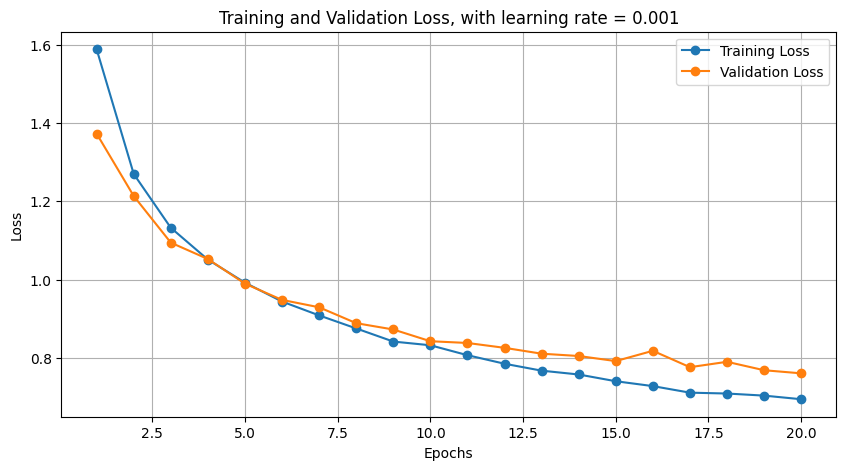

In [38]:
# Vẽ loss trên tập train và tập validation
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss, with learning rate = {}'.format(learning_rate))
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Testing on the test set
model.eval()
y_true_test = []
y_pred_test = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(predicted.cpu().numpy())

test_accuracy = accuracy_score(y_true_test, y_pred_test)
test_recall = recall_score(y_true_test, y_pred_test, average='macro')
test_f1 = f1_score(y_true_test, y_pred_test, average='macro')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

Test Accuracy: 0.7385
Test Recall: 0.7385
Test F1 Score: 0.7375


# 4.
Tại sao khi build model, càng những layer phía sau, width và height giảm nhưng depth lại tăng

**Convolution layer:**

Input HxWxD ---------> K kernels FxFxD with stride=S, padding=P
 ------------> Output
((H-F+2P)/S + 1) x ((H-F+2P)/S + 1) x K

K thường lớn hơn D --> sẽ làm tăng depth

nếu S > 1 --> width, height của output sẽ giảm




---




**Pooling layer:**
Chỉ lấy những thông tin quan trọng, giảm kích thước (width, height) của output, thường là giảm đi 1 nửa; depth không đổi

Ví dụ, input 4x4, đi qua pooling layer --> output 2x2

**Model càng sâu nghĩa là sử dụng càng nhiều các layer. Nhìn chung mỗi lần đi qua 1 layer, width và height của input sẽ giảm đi và depth tăng lên**

# 5.
(Optional) 1 bài viết hay bao gồm tool sử dụng để vísualize CNN model

- CNN Explainer: https://poloclub.github.io/cnn-explainer/
- Awesome Machine Learning Demos: https://github.com/MilesCranmer/awesome-ml-demos

Source: AI4E